In [2]:
import pandas as pd

# Reading the csv file
df = pd.read_csv('RansomwareData.csv')


In [3]:
X = df.drop(df.columns[0], axis=1)
X = X.drop(df.columns[1], axis=1)
X = X.drop(df.columns[2], axis=1)
y = df[df.columns[2]]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the autoencoder with a larger encoding dimension
input_dim = X_train.shape[1]
encoding_dim = 256  # Increased dimension

# Encoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)

# Decoder
decoder = Dense(input_dim, activation="sigmoid")(encoder)

# Autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder with a lower learning rate
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))


Epoch 1/50
39/39 [==============================] - 18s 435ms/step - loss: 0.0845 - val_loss: 0.0071
Epoch 2/50
39/39 [==============================] - 12s 296ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 3/50
39/39 [==============================] - 11s 292ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 4/50
39/39 [==============================] - 11s 290ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 5/50
39/39 [==============================] - 10s 255ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 6/50
39/39 [==============================] - 12s 321ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 7/50
39/39 [==============================] - 12s 302ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 8/50
39/39 [==============================] - 11s 288ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 9/50
39/39 [==============================] - 10s 241ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 10/50
39/39 [==============================] - 11s 281ms/step - loss: 0.0023 - val_lo

In [21]:
# Extract the encoder part of the autoencoder
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Transform the data to encoded representations
X_train_encoded = encoder_model.predict(X_train)
X_test_encoded = encoder_model.predict(X_test)


10/10 [==============================] - 0s 35ms/step


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling1D, Flatten, Dense, LSTM
from tensorflow.keras.optimizers import Adam# Build the deep neural network classifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Add the transformer block into your model
DNN = Sequential()
DNN.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(encoding_dim, 1)))
DNN.add(MaxPooling1D(pool_size=2))
DNN.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
DNN.add(MaxPooling1D(pool_size=2))
DNN.add(TransformerBlock(embed_dim=128, num_heads=4, ff_dim=256))
DNN.add(Flatten())
DNN.add(Dense(256, activation='relu'))
DNN.add(Dense(100, activation='relu'))
DNN.add(Dense(64, activation='relu'))
DNN.add(Dense(12, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
optimizer = Adam(learning_rate=0.001)
DNN.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = DNN.fit(X_train_encoded, y_train, epochs=500, batch_size=32, validation_data=(X_test_encoded, y_test), callbacks=[early_stopping])


Epoch 1/500
39/39 [==============================] - 17s 320ms/step - loss: 1.9940 - accuracy: 0.5632 - val_loss: 1.6509 - val_accuracy: 0.6164
Epoch 2/500
39/39 [==============================] - 11s 272ms/step - loss: 1.5818 - accuracy: 0.6190 - val_loss: 1.5781 - val_accuracy: 0.6164
Epoch 3/500
39/39 [==============================] - 12s 312ms/step - loss: 1.5086 - accuracy: 0.6190 - val_loss: 1.3632 - val_accuracy: 0.6164
Epoch 4/500
39/39 [==============================] - 13s 330ms/step - loss: 1.1842 - accuracy: 0.6486 - val_loss: 1.1749 - val_accuracy: 0.6590
Epoch 5/500
39/39 [==============================] - 13s 330ms/step - loss: 1.0613 - accuracy: 0.7044 - val_loss: 1.0029 - val_accuracy: 0.7279
Epoch 6/500
39/39 [==============================] - 14s 371ms/step - loss: 1.0069 - accuracy: 0.7143 - val_loss: 0.9423 - val_accuracy: 0.7443
Epoch 7/500
39/39 [==============================] - 14s 349ms/step - loss: 0.9355 - accuracy: 0.7340 - val_loss: 0.9923 - val_accuracy:

Train Accuracy: 0.8752, Test Accuracy: 0.8000


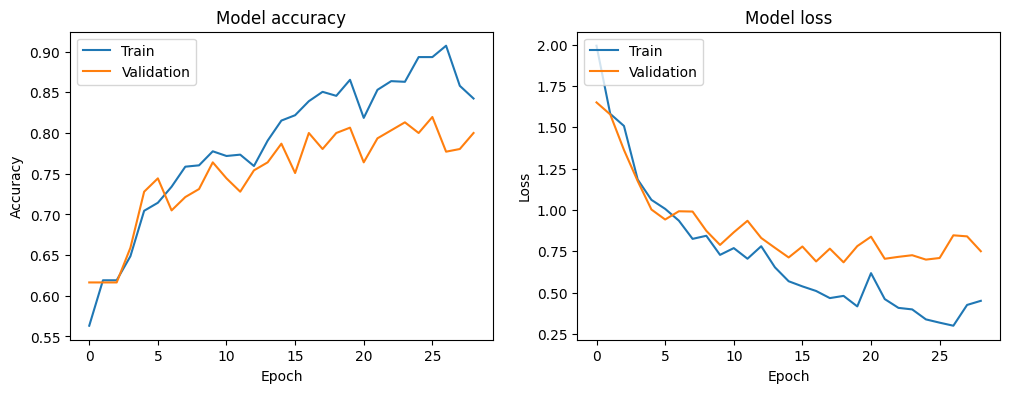

10/10 [==============================] - 1s 68ms/step


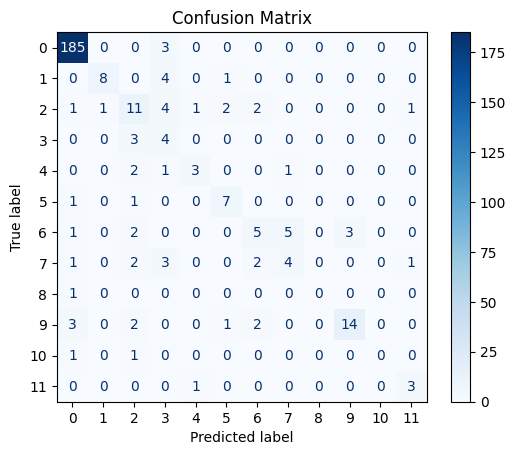

In [39]:
# Evaluate the model
train_acc = DNN.evaluate(X_train_encoded, y_train, verbose=0)[1]
test_acc = DNN.evaluate(X_test_encoded, y_test, verbose=0)[1]
print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Predict the values from the test set
y_pred = np.argmax(DNN.predict(X_test_encoded), axis=-1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
